# Computational Data Mining- Homework 7
Fatemeh Shiri

In [3]:
import pandas as pd
import numpy as np
import sys
import copy
from collections import defaultdict

import scipy.io
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.spatial import distance_matrix
import scipy.sparse.linalg as ll

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS as sci_mds, Isomap

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

## MDS

In [41]:
def MDS(D):
    n = D.shape[0]
    Dsqrt = D**2
    I = np.identity(n)
    one = np.ones(n)
    one = one[np.newaxis, :]
    oneT = one.T
    J = I-((one*oneT)/n)
    B = -(J@Dsqrt@J)/2
    # print(B)
    l, v = np.linalg.eigh(B) #matrix is symmetric
    print(l,v)
    a = l.argsort()[::-1]
    print(a)
    # print(v)
    print(v[:,a[:2]])
    print(l[a[:2]])
    A = v[:,a[:2]] * np.sqrt(l[a[:2]])
    return A


In [42]:
a = np.array(
    [
        [0, 159, 247, 131,197],
        [159, 0, 230, 97, 89],
        [247, 230, 0, 309, 317],
        [131, 97, 309, 0, 68],
        [197, 89, 317, 68, 0]
    ]
)

In [43]:
MDS(a)

[-7.40437506e+02  1.21933713e-12  1.78099027e+02  1.82383917e+04
  6.49407468e+04] [[-0.37218536 -0.4472136   0.05000366  0.81161523 -0.01607507]
 [-0.33462926 -0.4472136  -0.74781605 -0.3524633   0.06755759]
 [ 0.1958082  -0.4472136   0.19190318 -0.18491281 -0.83104727]
 [ 0.79429662 -0.4472136  -0.11682363  0.13237445  0.37137867]
 [-0.2832902  -0.4472136   0.62273284 -0.40661357  0.40818608]]
[4 3 2 1 0]
[[-0.01607507  0.81161523]
 [ 0.06755759 -0.3524633 ]
 [-0.83104727 -0.18491281]
 [ 0.37137867  0.13237445]
 [ 0.40818608 -0.40661357]]
[64940.74677544 18238.39170335]


array([[  -4.0964854 ,  109.60830414],
       [  17.21602028,  -47.60002429],
       [-211.77971915,  -24.97239954],
       [  94.64018914,   17.87711515],
       [ 104.01999512,  -54.91299545]])

In [36]:
sci_mds(2).fit_transform(a)

c:\Users\romin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


array([[-150.56233248,  -68.30911359],
       [  66.00875037,   73.79219548],
       [ 149.47669929, -346.18913721],
       [ -79.77443764,  146.54201333],
       [  14.85132046,  194.164042  ]])

## ISOMap

In [34]:
class Graph():

	def __init__(self, vertices, adj_matrix, k=10, isomap = True):
		self.V = vertices
		self.adj_matrix = adj_matrix
		self.k = k
		self.graph = defaultdict(lambda: defaultdict(list))
		if isomap:
			self.create_graph()
			self.k_neigbors()
			main_graph = self.keep_nearest()

	def add_edge(self, u, v, w, nearest_neighbor=0):
		self.graph[u][v].append([w, nearest_neighbor])
	
	def remove_edge(self, u, v):
		self.graph[u][v] = []
	
	def create_graph(self):
		for i in range(self.V):
			for j in range(self.V):
				# if self.adj_matrix[i][j] != 0:
				self.add_edge(i, j, self.adj_matrix[i][j], 0)

	def print_graph(self):
		print(self.graph)

	def k_neigbors(self):
		nearest_matrix = NearestNeighbors(n_neighbors=self.k, algorithm='ball_tree').fit(self.adj_matrix) \
						.kneighbors_graph(self.adj_matrix).toarray()
		# print(self.graph[0][1])
		for i in range(0, self.V):
			for j in range(0, self.V):
						self.graph[i][j][0][1] = nearest_matrix[i][j]

	def keep_nearest(self):
		main_graph = copy.deepcopy(self.graph)
		for i in range(0, self.V):
			for j in range(0, self.V):
				if self.graph[i][j][0][1] == 0:
					self.remove_edge(i, j)
		return main_graph

	def printSolution(self, dist):
		print("Vertex \tDistance from Source")
		for node in range(self.V):
			print(node, "\t", dist[node])

	def minDistance(self, dist, sptSet):
		min = sys.maxsize
		for u in range(self.V):
			if dist[u] < min and sptSet[u] == False:
				min = dist[u]
				min_index = u

		return min_index

	def dijkstra(self, src):
		dist = [sys.maxsize] * self.V
		dist[src] = 0
		sptSet = [False] * self.V
		for cout in range(self.V):
			x = self.minDistance(dist, sptSet)
			sptSet[x] = True
			for y in range(self.V):
				try:
					if self.graph[x][y][0][1] == 1 and self.graph[x][y][0][0] > 0 \
						and sptSet[y] == False and dist[y] > dist[x] + self.graph[x][y][0][0]:
						dist[y] = dist[x] + self.graph[x][y][0][0]
				except:
					pass

		#check if with k = x the graph is still connected
		return dist
	
	def get_distances(self):
		distances = []
		for i in range(self.V):
			distances.append(self.dijkstra(i))
		return distances
	
	def is_connected(self):
		# import networkx as nx
		# # nx.DiGraph()
		# G = nx.from_numpy_matrix(self.graph)
		# nx.is_connected(G)
		pass

# 1

## Read Data

In [3]:
df = pd.read_csv('CDM_Assignment_7/Part_1/distances.csv', index_col=0)

In [318]:
df.head()

,Ahvaz,Arak,Ardabil,Bandar Abbas,Birjand,Bojnord,Bushehr,Gorgan,Hamadan,Ilam,...,Semnan,Shahr-e Kord,Shiraz,Tabriz,Tehran,Urmia,Yasuj,Yazd,Zahedan,Zanjan
Ahvaz,0.0,320.0,771.0,864.0,1003.0,1044.0,335.0,806.0,386.0,335.0,...,641.0,230.0,411.0,783.0,546.0,768.0,283.0,538.0,1181.0,595.0
Arak,320.0,0.0,479.0,991.0,893.0,784.0,585.0,526.0,133.0,305.0,...,375.0,224.0,565.0,538.0,238.0,566.0,420.0,500.0,1172.0,307.0
Ardabil,771.0,479.0,0.0,1436.0,1153.0,797.0,1063.0,563.0,384.0,540.0,...,541.0,698.0,1036.0,177.0,398.0,293.0,895.0,896.0,1511.0,176.0
Bandar Abbas,864.0,991.0,1436.0,0.0,693.0,1148.0,567.0,1085.0,1122.0,1184.0,...,972.0,774.0,454.0,1527.0,1049.0,1557.0,597.0,554.0,517.0,1284.0
Birjand,1003.0,893.0,1153.0,693.0,0.0,539.0,912.0,619.0,1010.0,1191.0,...,614.0,785.0,732.0,1304.0,780.0,1384.0,761.0,468.0,407.0,1066.0


## MDS

In [9]:

A = MDS(df.values)

In [320]:
# A = MDS(euclidean_distances(df.values))

In [10]:
A = A[:,[1,0]]
# A[:,1] = A[:,1] * -1
A = A * -1

c:\Users\romin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


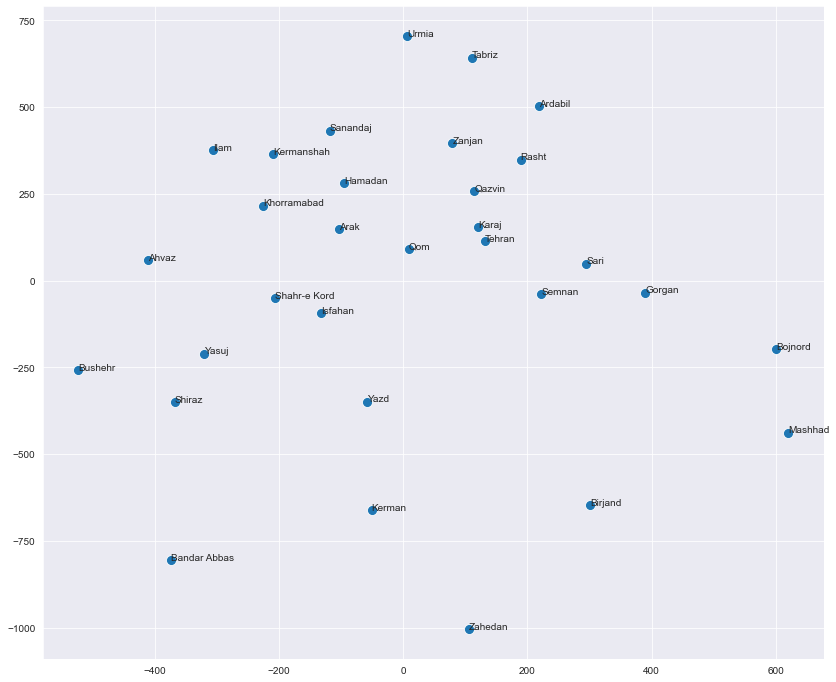

In [11]:
plt.rcParams['figure.figsize'] = (14, 12)

ax1 = sns.scatterplot(A[:,0], A[:,1], s=100)
for x in range(len(df.index)):
    plt.annotate(f'{df.index[x]}', (A[x,0], A[x,1]), fontsize=10)

# ax1 = sns.scatterplot(A[:,1], A[:,0], s=100)
# for x in range(len(df.index)):
    # plt.annotate(f'{df.index[x]}', (A[x,1], A[x,0]), fontsize=10)

## ISOMap

In [324]:
g = Graph(len(df.index), df.values, k = 8)
# g.print_graph()
distances = g.get_distances()
distances = np.array(distances)

In [328]:
A = MDS(distances, 2)

In [330]:
A = A[:,[1,0]]
# A[:,0] = A[:,0] * -1
A = A * -1

c:\Users\romin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


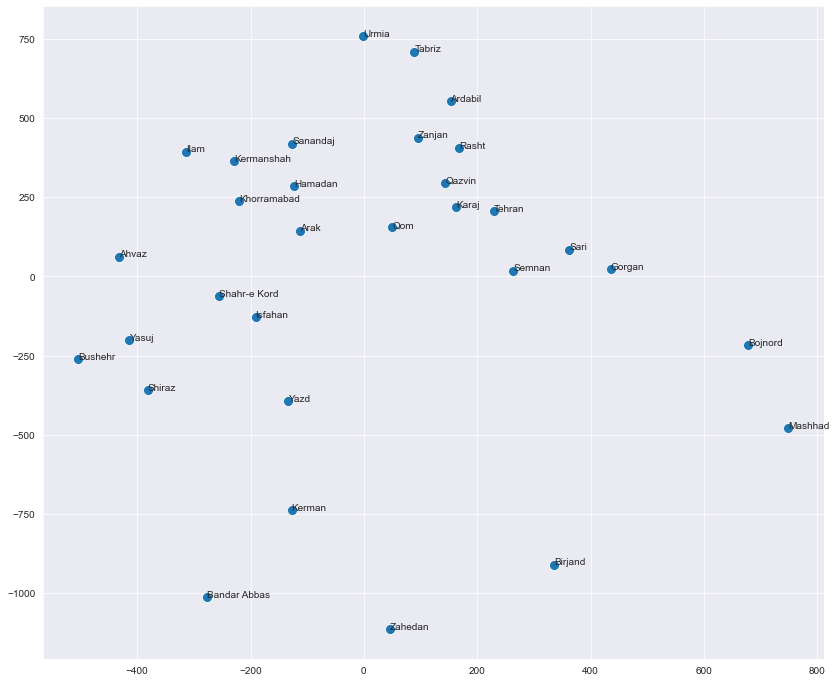

In [331]:
plt.rcParams['figure.figsize'] = (14, 12)

ax1 = sns.scatterplot(A[:,0], A[:,1], s=100)
for x in range(len(df.index)):
    plt.annotate(f'{df.index[x]}', (A[x,0], A[x,1]), fontsize=10)


## Scikit-Learn

In [335]:
# A = sci_mds(2, metric=False).fit_transform(df.values)
# A = sci_mds(2).fit_transform(euclidean_distances(df.values))
A = sci_mds(2).fit_transform(df.values)

c:\Users\romin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


In [333]:
# A = A[:,[1,0]]
# A[:,0] = A[:,0] * -1
# A = A * -1

c:\Users\romin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


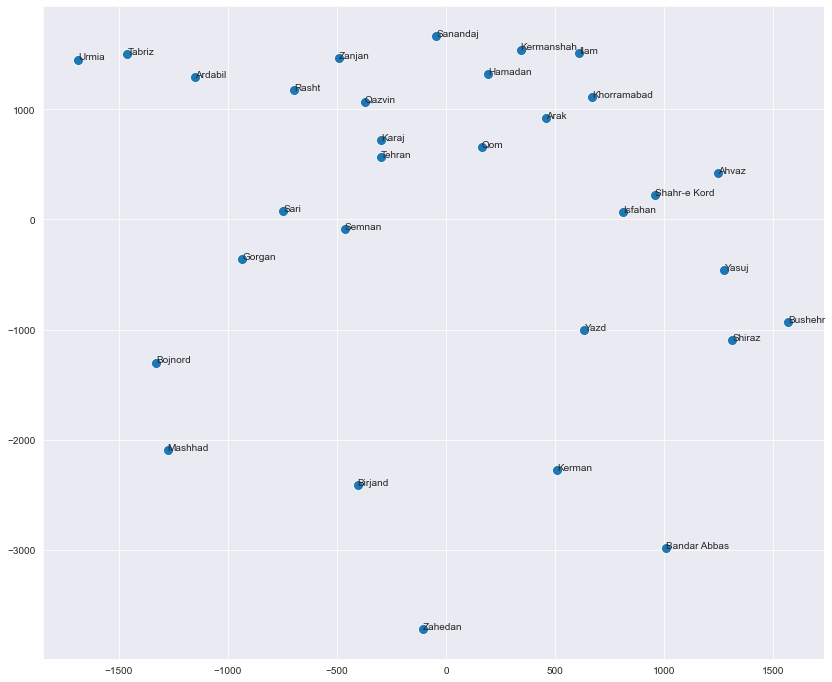

In [336]:
plt.rcParams['figure.figsize'] = (14, 12)

ax1 = sns.scatterplot(A[:,0], A[:,1], s=100)
for x in range(len(df.index)):
    plt.annotate(f'{df.index[x]}', (A[x,0], A[x,1]), fontsize=10)


In [337]:
B = Isomap(n_components=2, path_method='D', neighbors_algorithm='ball_tree').fit_transform(df.values)
B = B * -1

c:\Users\romin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


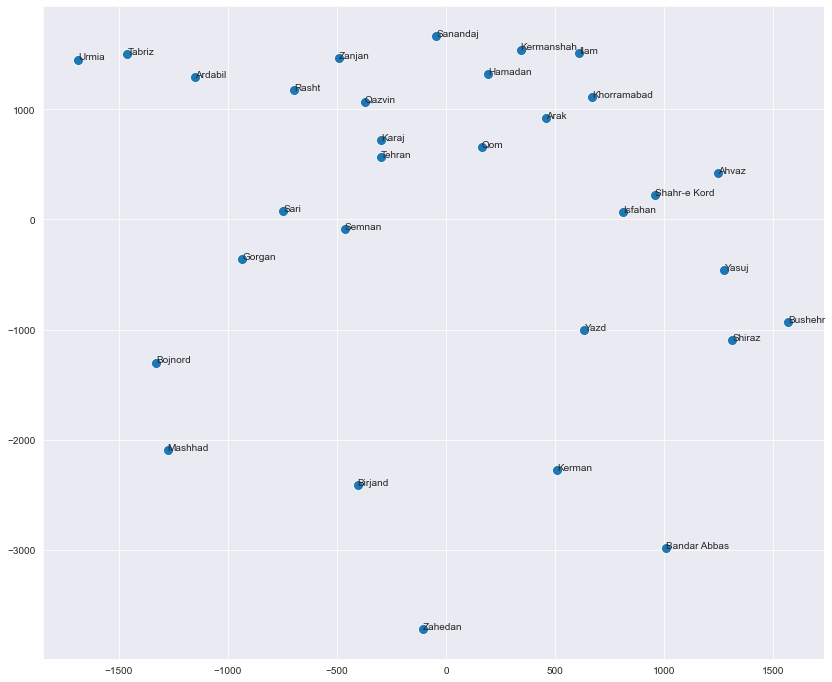

In [338]:
plt.rcParams['figure.figsize'] = (14, 12)

ax1 = sns.scatterplot(A[:,0], A[:,1], s=100)
for x in range(len(df.index)):
    plt.annotate(f'{df.index[x]}', (A[x,0], A[x,1]), fontsize=10)


# 2

In [14]:
images = scipy.io.loadmat('CDM_Assignment_7/Part_2/isomap.mat')['images']
dis = distance_matrix(images.T, images.T, 2)

In [17]:
def plot_graph_faces(components, x):

    m, n = x.shape
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = fig.add_subplot(111)
    ax.set_title("Faces")
    ax.set_xlabel('Component: 1')
    ax.set_ylabel('Component: 2')

    x_size = (max(components[:, 0]) - min(components[:, 0])) * 0.08
    y_size = (max(components[:, 1]) - min(components[:, 1])) * 0.08

    for i in range(50):

        img_num = np.random.randint(0, m)
        x0 = components[img_num, 0] - (x_size / 2.)
        y0 = components[img_num, 1] - (y_size / 2.)
        x1 = components[img_num, 0] + (x_size / 2.)
        y1 = components[img_num, 1] + (y_size / 2.)
        img = x[img_num, :].reshape(np.sqrt(n).astype(np.int32), np.sqrt(n).astype(np.int32)).T
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    ax.scatter(components[:, 0], components[:, 1], marker='.',alpha=0.7)

    ax.set_ylabel('Up-Down Pose')
    ax.set_xlabel('Right-Left Pose')

In [ ]:
A = MDS(dis, 2)

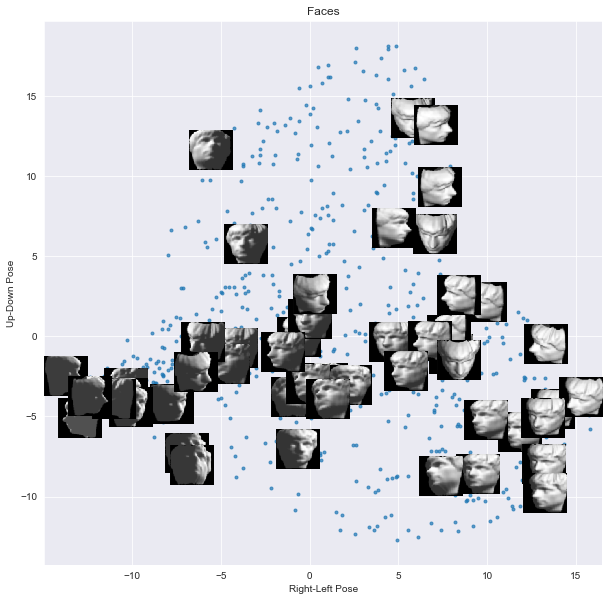

In [ ]:
plot_graph_faces(components=A, x=images.T)

In [35]:
g = Graph(len(dis), dis, k = 8)
# g.print_graph()
distances = g.get_distances()
distances = np.array(distances)
B = MDS(distances, 2)

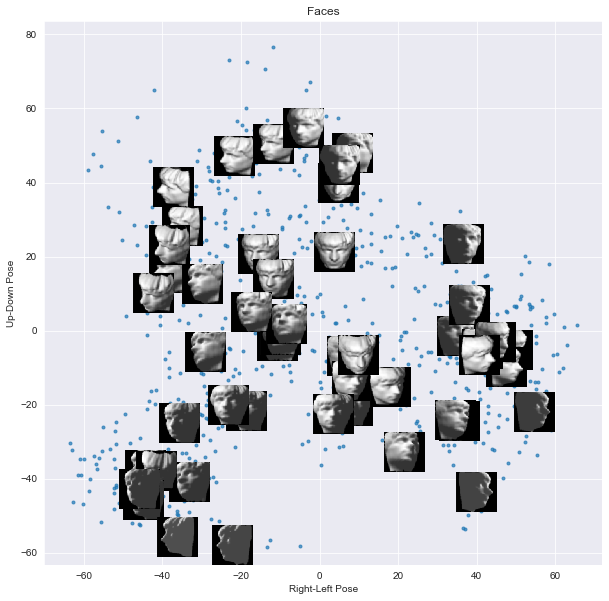

In [36]:
plot_graph_faces(components=B, x=images.T)

## Scikit-learn

In [15]:
A = sci_mds(2).fit_transform(dis)

c:\Users\romin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


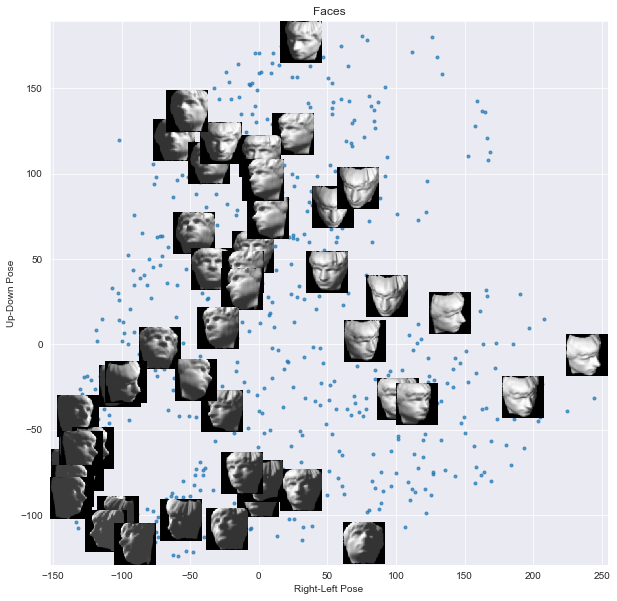

In [18]:
plot_graph_faces(components=A, x=images.T)

In [19]:
B = Isomap(n_components=2).fit_transform(dis)

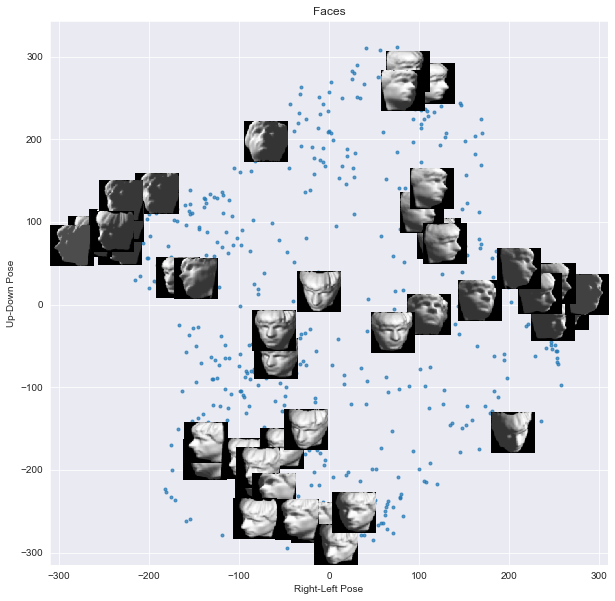

In [20]:
plot_graph_faces(B, images.T)